<a href="https://colab.research.google.com/github/Anali24/SIMULACION-I/blob/main/Monte_Carlo_Tan_SI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***Estmación de $$ \sqrt{arctan(x)}$$.***

Solución Analítica:

Queremos cualcular:

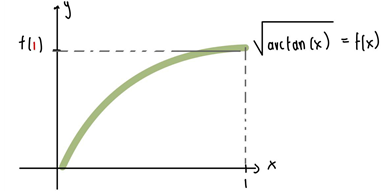

Así entonces para calular áreas , están dados por integrales.

$$ \implies I = \int_{0}^{1} \sqrt{arctan(x) } \, dx $$

$$ I = \frac{n éxitos}{N} $$

$$ n =Número de éxitos $$
$$ N = Número de Experimentos $$

***Analíticamente:***

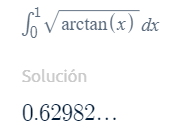

***Simulación:***

In [442]:
import random as rnd
import numpy as np
import math
import matplotlib.pyplot as plt
from scipy.stats import t
from scipy.integrate import quad
import pandas as pd

***Estimación***

In [443]:
def estimacion():
    u1 = np.random.uniform(0, 1)
    u2 = np.random.uniform(0, 1)
    if u2 < np.sqrt(math.atan(u1)):
        return 1  # éxito
    else:
        return 0  # fracaso


In [444]:
# Listas para guardar los resultados
p = []  # Lista vacía para guardar los elementos y obtener probabilidad
suma = 0  # Contador para la suma de éxitos
aciertos_x = []
aciertos_y = []
errores_x = []
errores_y = []

In [445]:
# Bucle para realizar las estimaciones
for i in range(N):
    u1 = np.random.uniform(0, 1)
    u2 = np.random.uniform(0, 1)
    if u2 < np.sqrt(math.atan(u1)):
        resultado = 1
        aciertos_x.append(u1)
        aciertos_y.append(u2)
    else:
        resultado = 0
        errores_x.append(u1)
        errores_y.append(u2)
    suma += resultado
    p.append(suma / (i + 1))  # Estimación de Pi


In [446]:
# Cálculo final de Tan
Tan_estimado = suma / N
print(f"Estimación final de arctan: {Tan_estimado}")

Estimación final de arctan: 0.6192


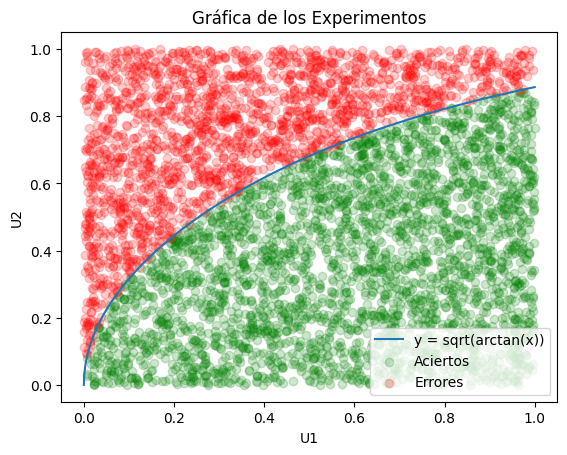

In [447]:
# Gráfica de los Experimentos
x = np.linspace(0, 1, 1000)
plt.plot(x, np.sqrt(np.arctan(x)), label='y = sqrt(arctan(x))')
plt.scatter(aciertos_x, aciertos_y, color='green', label='Aciertos', alpha=0.2)
plt.scatter(errores_x, errores_y, color='red', label='Errores', alpha=0.2)
plt.title('Gráfica de los Experimentos')
plt.xlabel('U1')
plt.ylabel('U2')
plt.legend()
plt.show()

***Histograma***

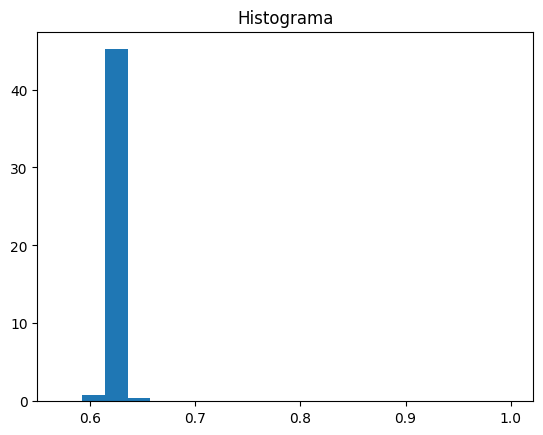

In [448]:
# Graficar del histograma
plt.hist(p, bins=20, density=True)
plt.title('Histograma')
plt.show()

Notemos que se ve una muestra de tamaño N$\approx 500$, nos da un resultado aceptable.

Ahora sabemos que la media $\mu$ está dada por el valor aproximado que nos acerca la función, es decir:

$$ \implies I = \int_{0}^{1} \sqrt{arctan(x) } \, dx = \mu ≈ 0.6298  $$

In [449]:
media = np.mean(p)
desviacion = np.std(p)

print(f"Media : {media}")
print(f"Desviación Estándar : {desviacion}")

Media : 0.6233306546167486
Desviación Estándar : 0.017316055144942607


Calculando el intervalo de confianza:

$$ \bar{x}  - \frac{S}{\sqrt{n}} t_{n-1 ,\alpha/2} \leq μ \leq  \bar{x}  + \frac{S}{\sqrt{n}} t_{n-1 ,\alpha/2} = 1 / α  $$

Suponiendo un nivel de significado de $α = 0.05$ , es decir con $ α - 1 = 95$

In [450]:
# Intervalo de confianza
alpha = 0.05
t_value = t.ppf(1 - alpha / 2, N - 1)
intervalo_confianza = (
    media - (t_value * desviacion / np.sqrt(N)),
    media + (t_value * desviacion / np.sqrt(N))
)

print(f"Intervalo de confianza: {intervalo_confianza}")

Intervalo de confianza: (0.6228505706376797, 0.6238107385958176)


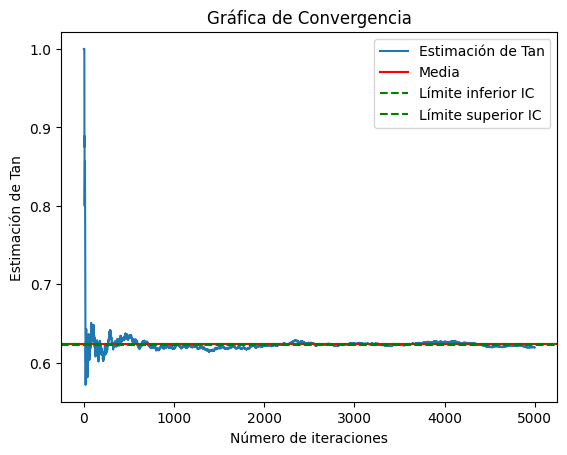

In [451]:
# Graficar la probabilidad con rectas de la media y el intervalo de confianza
plt.plot(p, label='Estimación de Tan')
plt.axhline(y=media, color='r', linestyle='-', label='Media')
plt.axhline(y=intervalo_confianza[0], color='g', linestyle='--', label='Límite inferior IC')
plt.axhline(y=intervalo_confianza[1], color='g', linestyle='--', label='Límite superior IC')
plt.title('Gráfica de Convergencia')
plt.xlabel('Número de iteraciones')
plt.ylabel('Estimación de Tan')
plt.legend()
plt.show()


Notemos que la media se aproxima bien.

**Media Muestral**

Pseudocódigo:
Monte Carlo de la Media Muestral

*Paso 1: Generar una secuencia {Ui}i=1^n ∼ Unif(0, 1).*

*Paso 2: Calcular Xi = a + Ui(b − a).*

*Paso 3: Calcular g(Xi), para i = 1, ..., n.*

*Paso 4: Estimar I calculando la media muestral $θ_{1}$ (Ecuación 5.5).*

In [452]:
# Parámetros
n = 5000  # Número de muestras
a = 0  # Límite inferior
b = 1  # Límite superior

# Paso 1: Generar una secuencia {Ui} ~ Unif(0, 1)
U = np.random.uniform(0, 1, n)

# Paso 2: Calcular Xi = a + Ui(b − a)
X = a + U * (b - a)

# Definir la función g(X) que queremos integrar
def g(x):
    return np.sqrt(np.arctan(x)) # Ejemplo de función g(x) = sqrt(arctan(x))

# Paso 3: Calcular g(Xi) para i = 1, ..., n
g_X = g(X)

# Paso 4: Estimar I calculando la media muestral θ1
theta1 = (b - a) * np.mean(g_X)

# Imprimir el resultado
print(f"Estimación de la integral I utilizando Media Muestra: {theta1}")

Estimación de la integral I utilizando Media Muestra: 0.6281472237922912


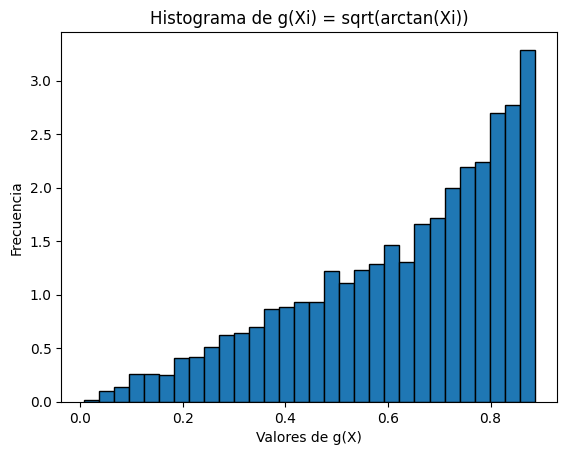

In [453]:
# Graficar histograma de g(Xi)
plt.hist(g_X, bins=30,edgecolor='k', density=True)
plt.xlabel('Valores de g(X)')
plt.ylabel('Frecuencia')
plt.title('Histograma de g(Xi) = sqrt(arctan(Xi))')
plt.show()

In [454]:
# Calcular la convergencia de la estimación
estimaciones = np.cumsum(g_X) / (np.arange(n) + 1)
convergencia = (b - a) * estimaciones

Calculamos la Varianza y Desviacón de la siguiente forma:

$$ Var(ϴ_{1}) = \frac{1}{n}[ (b-a) \int_{a}^{b} g^2 (x)dx -I^2  $$

In [455]:
# Calcular la media y desviación estándar
def integrando(x):
    return g(x)**2

integral_g2, _ = quad(integrando, a, b)
Var_theta1 = ((b - a) * integral_g2 - theta1**2) / n
sigma_theta1 = np.sqrt(Var_theta1)


In [456]:
# Intervalo de confianza para theta1
alpha = 0.05
t_value = t.ppf(1 - alpha / 2, n - 1)
intervalo_confianza = (
    theta1 - t_value * sigma_theta1,
    theta1 + t_value * sigma_theta1
)

print(f"Estimación de la integral I utilizando el método de Monte Carlo: {theta1}")
print(f"Varianza de theta1: {Var_theta1}")
print(f"Desviación estándar de theta1: {sigma_theta1}")
print(f"Intervalo de confianza para theta1: {intervalo_confianza}")


Estimación de la integral I utilizando el método de Monte Carlo: 0.6281472237922912
Varianza de theta1: 8.851127671902591e-06
Desviación estándar de theta1: 0.002975084481473189
Intervalo de confianza para theta1: (0.6223147531977281, 0.6339796943868542)


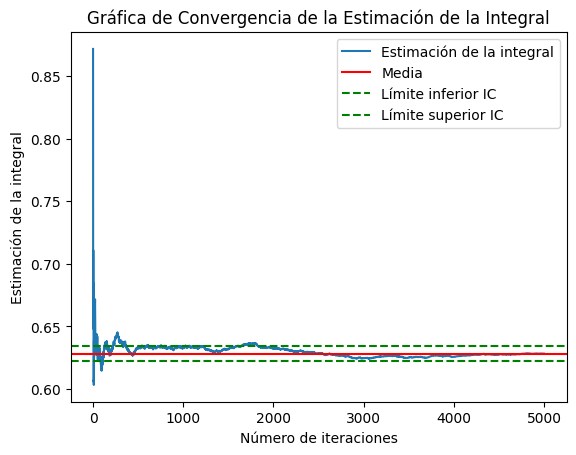

In [457]:
# Graficar la convergencia con la media y el intervalo de confianza
plt.plot(convergencia, label='Estimación de la integral')
plt.axhline(y=theta1, color='r', linestyle='-', label='Media')
plt.axhline(y=intervalo_confianza[0], color='g', linestyle='--', label='Límite inferior IC')
plt.axhline(y=intervalo_confianza[1], color='g', linestyle='--', label='Límite superior IC')
plt.title('Gráfica de Convergencia de la Estimación de la Integral')
plt.xlabel('Número de iteraciones')
plt.ylabel('Estimación de la integral')
plt.legend()
plt.show()

Obsérvese que el histograma sugiere una distribución normal para los resultados de este experimento, lo que está de acuerdo con el teorema central del límite.

**Acierto y Errror**

Paso 1: Generar una secuencia {Ui}i=1^2n ∼ Unif(0, 1).

Paso 2: Conformar pares (Ui, Un+i), para i = 1, ..., n.

Paso 3: Calcular Xi = a + Ui(b − a), para i = 1, ..., n.

Paso 4: Calcular g(Xi), para i = 1, ..., n.

Paso 5: Contar los aciertos $n_{a}$ tales que $g(Xi) > cUn+i$.

Paso 6: Estimar I calculando la media muestral θ2 (Ecuación 5.6).

In [458]:
# Parámetros
n = 5000  # Número de pares de puntos
a = 0     # Límite inferior de x
b = 1     # Límite superior de x

# Paso 1: Generar una secuencia {Ui} de tamaño 2n
U = np.random.uniform(0, 1, 2 * n)

# Paso 2: Conformar pares (Ui, Un+i)
U1 = U[:n]
U2 = U[n:]

# Paso 3: Calcular Xi = a + Ui(b - a)
X = a + U1 * (b - a)

# Paso 4: Calcular g(Xi) = sqrt(arctan(Xi))
g_X = np.sqrt(np.arctan(X))

# Paso 5: Contar los aciertos na tales que g(Xi) > cUn+i
aciertos = g_X > U2
na = np.sum(aciertos)

# Paso 6: Estimar I calculando la media muestral θ2
I_estimado = na / n
print(f"Estimación de I: {I_estimado}")

Estimación de I: 0.6354


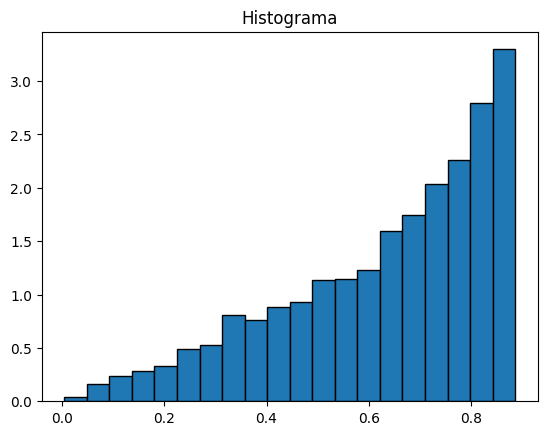

In [459]:
# Graficar del histograma
plt.hist(g_X, bins=20,edgecolor='k', density=True)
plt.title('Histograma')
plt.show()

Ahora calcularemos la Varianza de la siguiente forma:

$$Var(ϴ_{2}) = \frac{1}{n} [  c(b-a) -I]$$

$$ σ_{2} = \frac{\sqrt{[  c(b-a) -I]}}{\sqrt{n}} $$

In [460]:
# Varianza y desviación estándar
c=1  #valor que acota la función
Var_theta2 = (c * (b - a) - I_estimado) / n
sigma2 = np.sqrt(Var_theta2) / np.sqrt(n)

print(f"Varianza de theta2: {Var_theta2}")
print(f"Desviación estándar de theta2: {sigma2}")

Varianza de theta2: 7.292000000000001e-05
Desviación estándar de theta2: 0.00012076423311560422


In [461]:
# Intervalo de confianza para la media
alpha = 0.05
t_value = t.ppf(1 - alpha / 2, n - 1)
intervalo_confianza = (
    I_estimado - t_value * sigma2,
    I_estimado + t_value * sigma2
)

print(f"Intervalo de confianza: {intervalo_confianza}")


Intervalo de confianza: (0.6351632491302657, 0.6356367508697343)


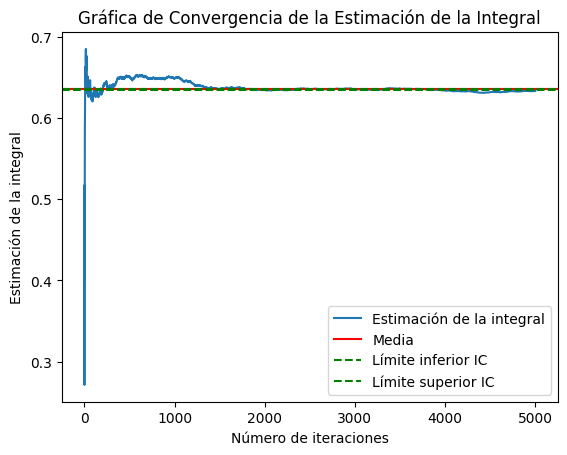

In [462]:
# Graficar la convergencia con la media y el intervalo de confianza
estimaciones = np.cumsum(g_X) / (np.arange(n) + 1)
convergencia = (b - a) * estimaciones

plt.plot(convergencia, label='Estimación de la integral')
plt.axhline(y=I_estimado, color='r', linestyle='-', label='Media')
plt.axhline(y=intervalo_confianza[0], color='g', linestyle='--', label='Límite inferior IC')
plt.axhline(y=intervalo_confianza[1], color='g', linestyle='--', label='Límite superior IC')
plt.title('Gráfica de Convergencia de la Estimación de la Integral')
plt.xlabel('Número de iteraciones')
plt.ylabel('Estimación de la integral')
plt.legend()
plt.show()

Así recabando los resultados obtenidos mediante los tres métodos:

**Estimación**

**Media Muestra**

**Acierto y Error**



In [463]:
# Crear la tabla
data = {
    "Método": ["Monte Carlo", "Acierto y Erro", "Media Muestral"],
    "Estimación de I": [Tan_estimado , theta1, I_estimado]
}

# Crear un DataFrame
df = pd.DataFrame(data)

# Mostrar la tabla
print("Resultados de los métodos:")
print(df)

Resultados de los métodos:
           Método  Estimación de I
0     Monte Carlo         0.619200
1  Acierto y Erro         0.628147
2  Media Muestral         0.635400



**Conclusiones:**

El método de Monte Carlo calcula la integral utilizando muestras aleatorias según la distribución uniforme.

La Estimación de Media Muestral utiliza pares de puntos para estimar la integral basada en comparaciones con una función g(x).

El método de Acierto y Error produce una estimación de arctan con una precisión determinada por N.

